In [49]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

import joblib
%matplotlib inline

In [3]:
df = pd.read_csv('../input/gender-classification-dataset/gender_classification_v7.csv')
df.shape

(5001, 8)

In [4]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [5]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

# Frequency of gender

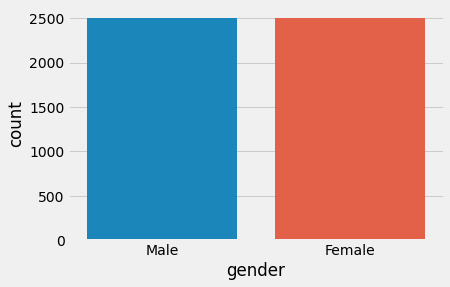

In [7]:
plt.style.use('fivethirtyeight')
sns.countplot(x=df['gender'])
plt.show()

In [8]:
df['gender'].replace(['Male', 'Female'],[1,0],inplace=True)

# **Frequency of 'long_hair', 'nose_wide', 'nose_long' and 'lips_thin'**

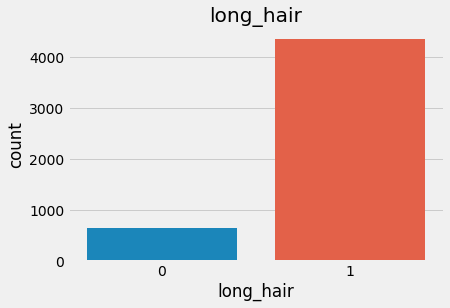

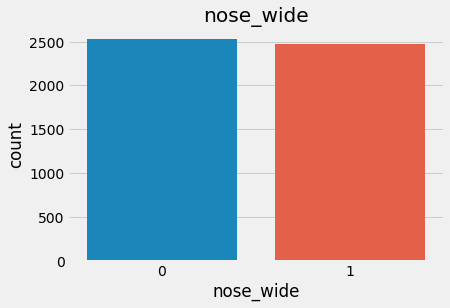

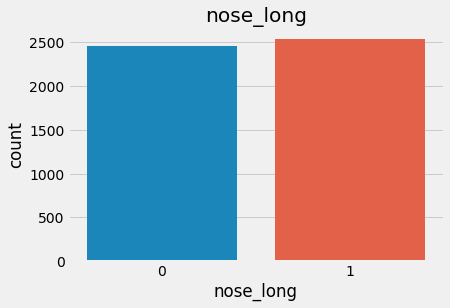

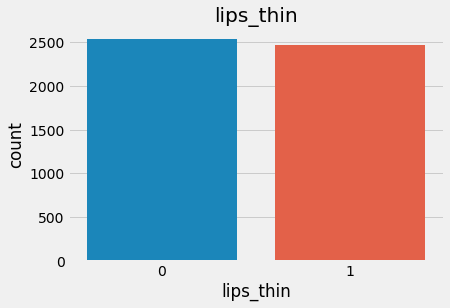

In [9]:
cols = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin']
for col in cols:
    plt.style.use('fivethirtyeight')
    plt.title(col)
    sns.countplot(x=df[col])
    plt.show()
    print('\n')

# **Histogram of 'forehead_height_cm' and 'forehead_width_cm'**

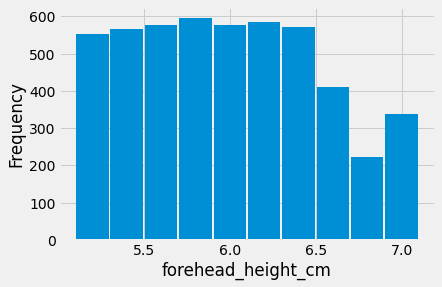

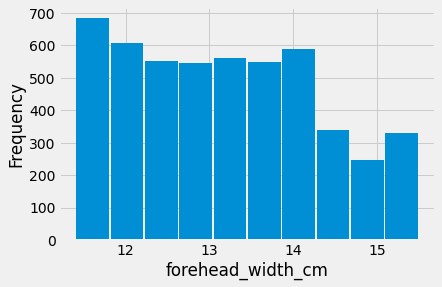

In [10]:
cols2 = ['forehead_height_cm','forehead_width_cm']
for col in cols2:
    plt.style.use('fivethirtyeight')
    df[col].plot(kind='hist', rwidth=0.95)
    plt.xlabel(col)
    plt.show()
    print('\n')

# **Male vs Female**

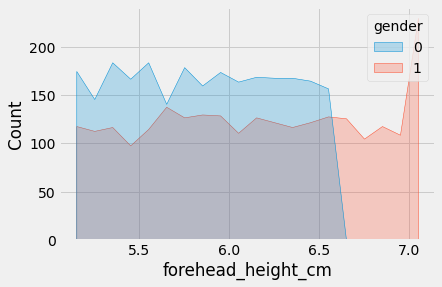

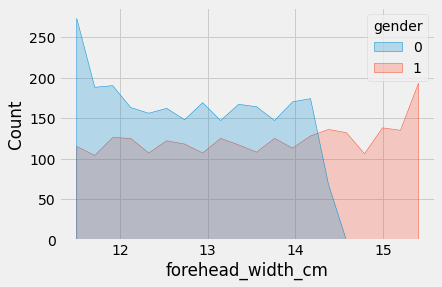

In [11]:
for col in cols2:
    sns.histplot(data=df[[col,'gender']],x=col, hue='gender',element='poly')
    plt.show()

In [12]:
male_data = df[df['gender'] == 1]
female_data = df[df['gender'] == 0]

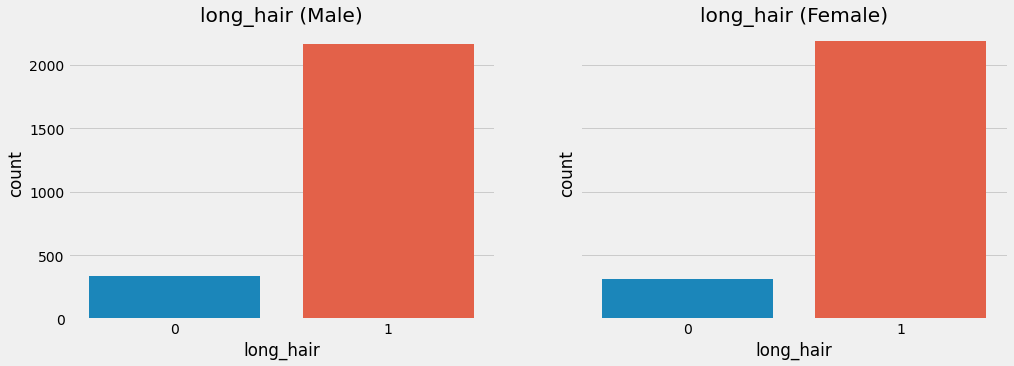

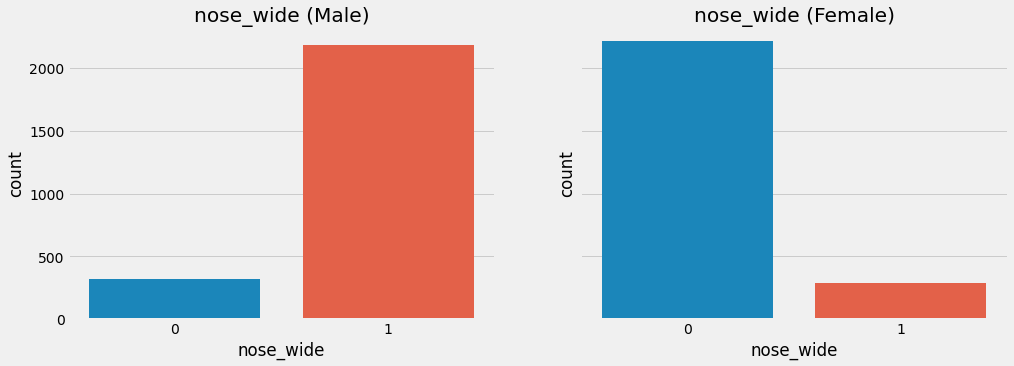

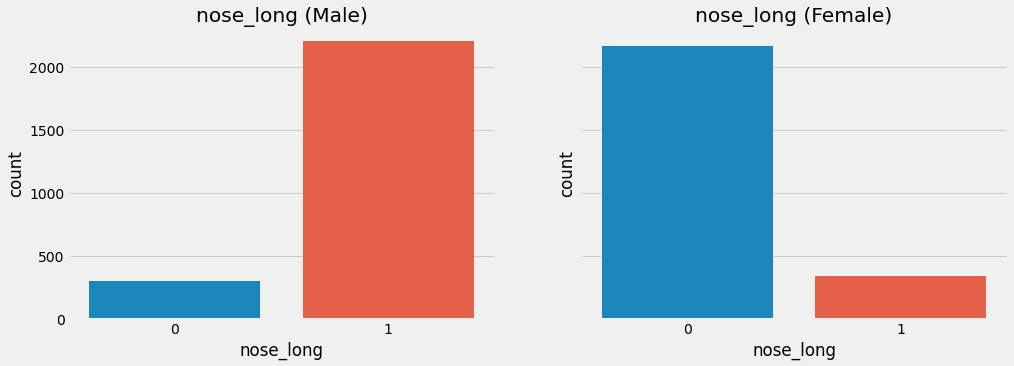

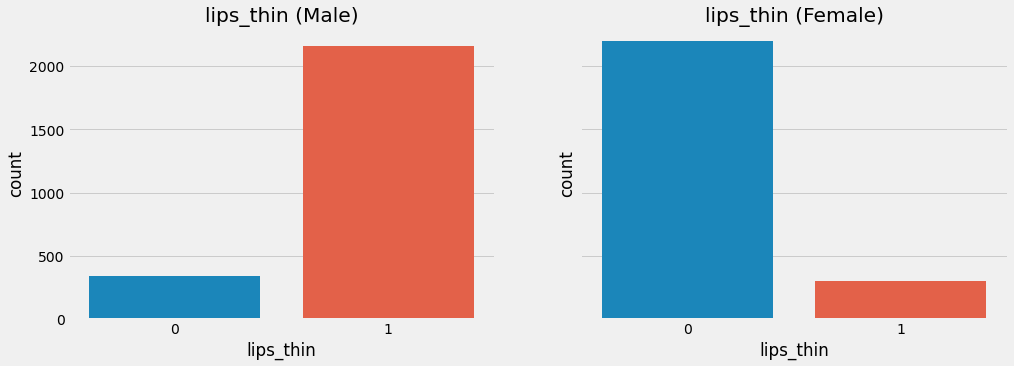

In [13]:
for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

    sns.countplot(ax=axes[0], x=male_data[col])
    axes[0].set_title(f'{col} (Male)')

    sns.countplot(ax=axes[1], x=female_data[col])
    axes[1].set_title(f'{col} (Female)')
    plt.show()

# **Feature Scaling**

In [14]:
cols2

['forehead_height_cm', 'forehead_width_cm']

In [15]:
scale = MinMaxScaler()
scale.fit(df[cols2])
scalled = scale.fit_transform(df[cols2])

In [16]:
for i in range(2):
    df[cols2[i]] =scalled[:,i]

In [17]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,0.097561,0.50,1,0,1,1,1
1,0,0.634146,0.15,0,0,1,0,0
2,0,0.097561,0.60,1,1,1,1,1
3,0,0.731707,0.50,0,1,1,1,1
4,1,0.512195,0.40,0,0,0,0,0


# **Splitting and Training**

In [18]:
x ,y = df.drop('gender', axis=1), df['gender']

In [19]:
x.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,0.097561,0.50,1,0,1,1
1,0,0.634146,0.15,0,0,1,0
2,0,0.097561,0.60,1,1,1,1
3,0,0.731707,0.50,0,1,1,1
4,1,0.512195,0.40,0,0,0,0


In [20]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [23]:
x_train.shape, x_test.shape

((3500, 7), (1501, 7))

In [24]:
y_train.shape, y_test.shape

((3500,), (1501,))

# **Model Building and predictions**

In [25]:
model = keras.Sequential([
                          keras.layers.Dense(7, input_shape=(7,), activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

In [26]:
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
110/110 [==============================] - 1s 978us/step - loss: 0.5466 - accuracy: 0.8039
Epoch 2/500
110/110 [==============================] - 0s 939us/step - loss: 0.3947 - accuracy: 0.9030
Epoch 3/500
110/110 [==============================] - 0s 916us/step - loss: 0.2710 - accuracy: 0.9507
Epoch 4/500
110/110 [==============================] - 0s 967us/step - loss: 0.2008 - accuracy: 0.9499
Epoch 5/500
110/110 [==============================] - 0s 949us/step - loss: 0.1614 - accuracy: 0.9460
Epoch 6/500
110/110 [==============================] - 0s 963us/step - loss: 0.1327 - accuracy: 0.9590
Epoch 7/500
110/110 [==============================] - 0s 906us/step - loss: 0.1190 - accuracy: 0.9565
Epoch 8/500
110/110 [==============================] - 0s 910us/step - loss: 0.1143 - accuracy: 0.9526
Epoch 9/500
110/110 [==============================] - 0s 911us/step - loss: 0.1022 - accuracy: 0.9565
Epoch 10/500
110/110 [==============================] - 0s 949us/step - l

In [27]:
model.evaluate(x_test, y_test)

47/47 [==============================] - 0s 794us/step - loss: 0.0788 - accuracy: 0.9707


[0.07881131768226624, 0.9706861972808838]

In [28]:
y_predict_test = model.predict(x_test).flatten()
y_predict_train = model.predict(x_train).flatten()

In [34]:
def round_up_sigmoid(data):
    data[data >= 0.5] = 1
    data[data < 0.5] = 0
    return data

In [35]:
y_predict_test = round_up_sigmoid(y_predict_test)
y_predict_train = round_up_sigmoid(y_predict_train)

In [36]:
cm_test = confusion_matrix(y_test, y_predict_test) 
cm_train = confusion_matrix(y_train, y_predict_train)

# **Metric Evaluation**

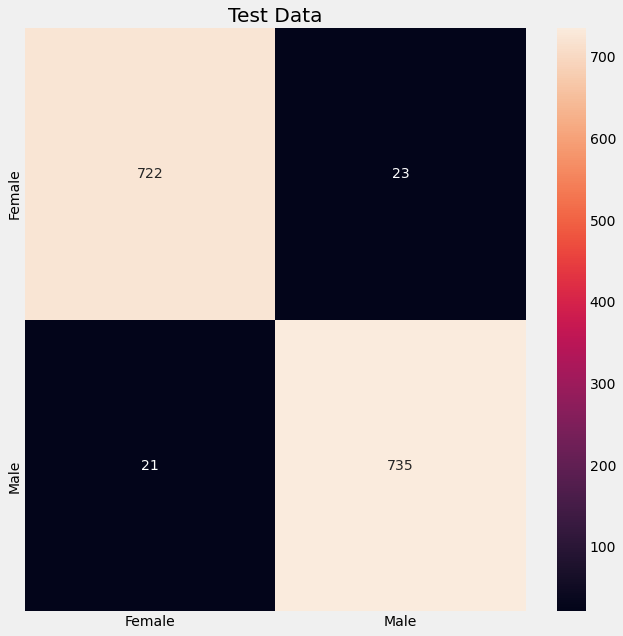

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_test, annot=True, fmt='g', xticklabels=['Female','Male'],yticklabels=['Female','Male'])
plt.title('Test Data')
plt.show()

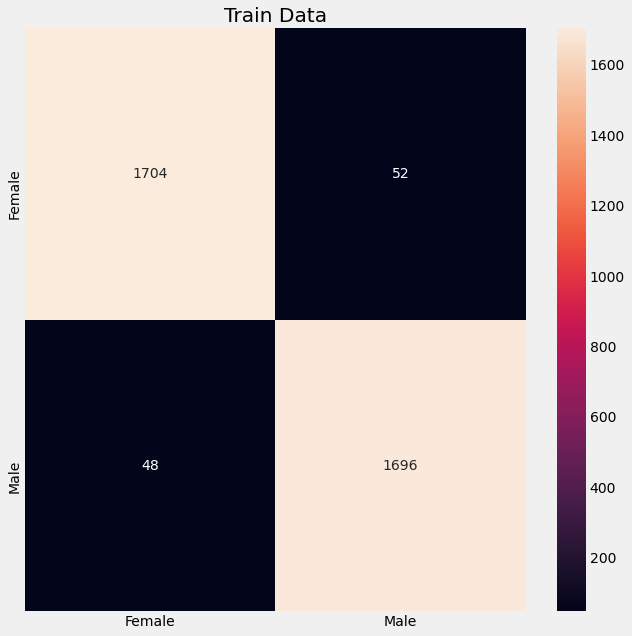

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_train, annot=True, fmt='g', xticklabels=['Female','Male'],yticklabels=['Female','Male'])
plt.title('Train Data')
plt.show()

# **Classification reports**

In [44]:
print('Test Data report:')
print(classification_report(y_test,y_predict_test))

Test Data report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       745
           1       0.97      0.97      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [45]:
print('Train Data report')
print(classification_report(y_train,y_predict_train))

Train Data report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1756
           1       0.97      0.97      0.97      1744

    accuracy                           0.97      3500
   macro avg       0.97      0.97      0.97      3500
weighted avg       0.97      0.97      0.97      3500



# **Saving Model as file**

In [60]:
model.save('Gender-Classifier-Model.h5')

In [61]:
!ls

Gender-Classifier-Model.h5  assets	    variables
__notebook_source__.ipynb   saved_model.pb
